<a href="https://colab.research.google.com/github/haiderzm/NeuralNetwithPyTorch/blob/master/CelciusToFahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install torch

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [0]:
x = torch.tensor([[0],[5],[10],[15],[20]],dtype=torch.float32)
y = torch.tensor([[32],[41],[50],[59],[68]],dtype=torch.float32)

In [0]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(1,3)
        self.fc2=nn.Linear(3,1)
        
        
    def forward(self,x):
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x
net = Model()

In [0]:
net

Model(
  (fc1): Linear(in_features=1, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)

In [0]:
loss = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(),lr=0.01)


for i in range(1000):
    optimizer.zero_grad()
    out = net(x)
    err = loss(y,out)
    err.backward()
    optimizer.step()

In [0]:
net(x)

tensor([[32.0000],
        [41.0000],
        [50.0000],
        [59.0000],
        [68.0000]], grad_fn=<AddmmBackward>)

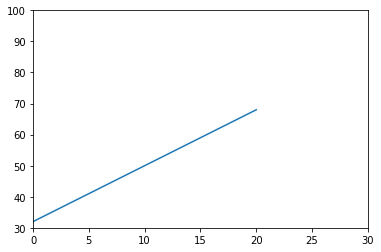

In [0]:
plt.plot(x.numpy().squeeze(),y.numpy().squeeze())
plt.ylim(30,100)
plt.xlim(0,30)
yp=net(x)
#plt.plot(x.numpy().squeeze(),yp.numpy().squeeze())

In [0]:
xp = torch.tensor([[6]],dtype=torch.float32)
net(xp)

tensor([[42.8000]], grad_fn=<AddmmBackward>)